# Linear Regression

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/DianCA26/Dataset/main/CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:xlabel='highwaympg', ylabel='price'>

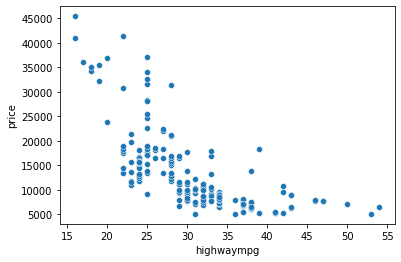

In [4]:
sns.scatterplot(x='highwaympg',y='price',data=df)

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

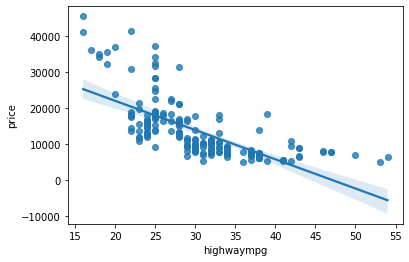

In [5]:
sns.regplot(x='highwaympg',y='price',data=df)

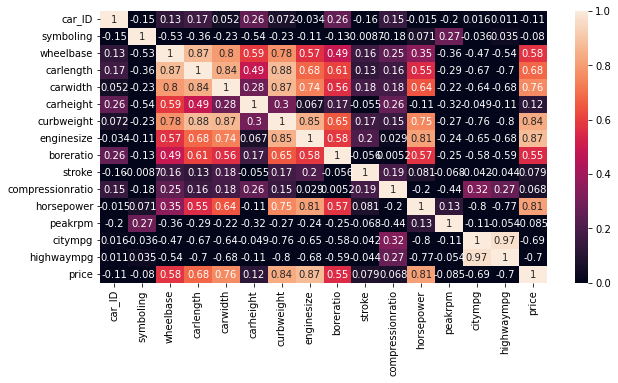

In [6]:
corr = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

In [7]:
X = df[['highwaympg','citympg','peakrpm']]
y = df['price']

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Model Definition

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## Train Model

In [10]:
mod=model.fit(X_train,y_train)

In [11]:
y_pred_train = mod.predict(X_train)
y_pred_test = mod.predict(X_test)

## Evaluation Model

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  4415.872655004902
MAE test =  3441.5337828415504
MSE train =  34430996.00983288
MSE test =  20835468.65590803
RMSE train =  5867.79311239182
RMSE test =  4564.58855275128
r2score train =  0.5016965393739018
r2score test =  0.3781270273077818


## Coefficients

In [13]:
mod.coef_

array([-789.40595454,  -53.0054067 ,   -1.77520246])

In [14]:
coeff_df = pd.DataFrame(mod.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highwaympg,-789.405955
citympg,-53.005407
peakrpm,-1.775202


In [15]:
X.head()

,highwaympg,citympg,peakrpm
0,27,21,5000
1,27,21,5000
2,26,19,5000
3,30,24,5500
4,22,18,5500


# Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [18]:
poly_features = polynomial_converter.fit_transform(X_train)

In [19]:
poly_feature_test = polynomial_converter.transform(X_test)

In [20]:
poly_features.shape

(164, 9)

In [21]:
X_train.shape

(164, 3)

## Model Definition & Train Model

In [22]:
poly_model = LinearRegression()
poly_model.fit(poly_features,y_train)

LinearRegression()

In [23]:
poly_predict_train = poly_model.predict(poly_features)
poly_predict_test = poly_model.predict(poly_feature_test)

## Evaluation Model

matrics with polynomial

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, poly_predict_train))
print('MAE test = ', mean_absolute_error(y_test, poly_predict_test))

print('MSE train = ', mean_squared_error(y_train, poly_predict_train))
print('MSE test = ', mean_squared_error(y_test, poly_predict_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, poly_predict_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, poly_predict_test)))

print('r2score train = ', r2_score(y_train, poly_predict_train))
print('r2score test = ', r2_score(y_test, poly_predict_test))

MAE train =  3057.520048694718
MAE test =  2658.6774098903634
MSE train =  18411031.249542546
MSE test =  14791216.795393663
RMSE train =  4290.807761895486
RMSE test =  3845.9351002576295
r2score train =  0.7335458845651088
r2score test =  0.5585288667995334


matrics with linear regression

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  4415.872655004902
MAE test =  3441.5337828415504
MSE train =  34430996.00983288
MSE test =  20835468.65590803
RMSE train =  5867.79311239182
RMSE test =  4564.58855275128
r2score train =  0.5016965393739018
r2score test =  0.3781270273077818


# Ridge Regression (L2)

In [26]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)

In [27]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [28]:
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)

## Model Evaluation

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, ridge_pred_train))
print('MAE test = ', mean_absolute_error(y_test, ridge_pred_test))

print('MSE train = ', mean_squared_error(y_train, ridge_pred_train))
print('MSE test = ', mean_squared_error(y_test, ridge_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, ridge_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, ridge_pred_test)))

print('r2score train = ', r2_score(y_train, ridge_pred_train))
print('r2score test = ', r2_score(y_test, ridge_pred_test))

MAE train =  4417.686891532277
MAE test =  3434.9588020654005
MSE train =  34431810.057661824
MSE test =  20688084.739080187
RMSE train =  5867.862477739388
RMSE test =  4548.415629544005
r2score train =  0.5016847580461075
r2score test =  0.3825259720110853


# Lasso Regerssion (L1)

In [30]:
from sklearn.linear_model import Lasso

In [31]:
lasso_model = Lasso()

In [32]:
lasso_model.fit(X_train,y_train)

Lasso()

In [33]:
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)

## Model Evaluation

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, lasso_pred_train))
print('MAE test = ', mean_absolute_error(y_test, lasso_pred_test))

print('MSE train = ', mean_squared_error(y_train, lasso_pred_train))
print('MSE test = ', mean_squared_error(y_test, lasso_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, lasso_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, lasso_pred_test)))

print('r2score train = ', r2_score(y_train, lasso_pred_train))
print('r2score test = ', r2_score(y_test, lasso_pred_test))

MAE train =  4415.771985454164
MAE test =  3441.874695430005
MSE train =  34430997.81489485
MSE test =  20842416.23608157
RMSE train =  5867.793266202793
RMSE test =  4565.3495195966725
r2score train =  0.5016965132500968
r2score test =  0.3779196639694816


# Elastic Net (L3)

In [35]:
from sklearn.linear_model import ElasticNet

In [36]:
elastic_model = ElasticNet()

In [37]:
elastic_model.fit(X_train,y_train)

ElasticNet()

In [38]:
elastic_pred_train = elastic_model.predict(X_train)
elastic_pred_test = elastic_model.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE train = ', mean_absolute_error(y_train, elastic_pred_train))
print('MAE test = ', mean_absolute_error(y_test, elastic_pred_test))

print('MSE train = ', mean_squared_error(y_train, elastic_pred_train))
print('MSE test = ', mean_squared_error(y_test, elastic_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, elastic_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, elastic_pred_test)))

print('r2score train = ', r2_score(y_train, elastic_pred_train))
print('r2score test = ', r2_score(y_test, elastic_pred_test))

MAE train =  4426.071270802286
MAE test =  3404.223126074672
MSE train =  34459590.404027216
MSE test =  20003476.40744998
RMSE train =  5870.229161116899
RMSE test =  4472.524612279957
r2score train =  0.5012827062806775
r2score test =  0.4029593697594972


# Logistic Regression

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/DianCA26/Dataset/main/mushrooms.csv')

In [41]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [42]:
X = df.drop('class',axis=1)
y = df['class']

## Train Test Split & Encoding

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [45]:
enc = OneHotEncoder()
enc.fit(X_train)

OneHotEncoder()

In [46]:
X_enc=enc.transform(X_train).toarray()
X_enc_test=enc.transform(X_test).toarray()

## Model Definition

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_model = LogisticRegression()

In [49]:
log_model.fit(X_enc,y_train)

LogisticRegression()

## Model Evaluation

In [50]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [51]:
y_pred_train = log_model.predict(X_enc)
y_pred_test = log_model.predict(X_enc_test)

In [52]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  1.0
accuracy score test :  1.0


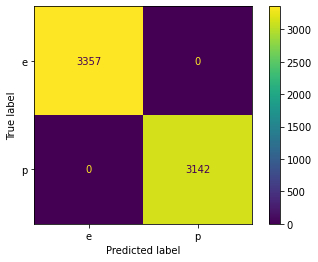

In [53]:
cm = confusion_matrix(y_train, y_pred_train, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

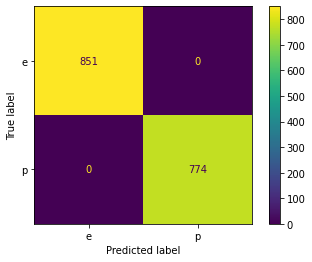

In [54]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [55]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [56]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3357
           p       1.00      1.00      1.00      3142

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



# Multiclass LogReg

In [57]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [58]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

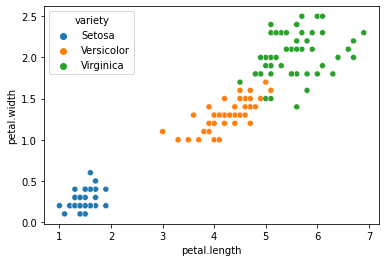

In [59]:
sns.scatterplot(x='petal.length',y='petal.width',data=df,hue='variety')

<AxesSubplot:>

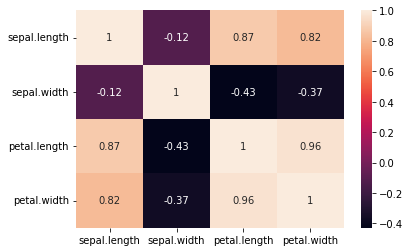

In [60]:
sns.heatmap(df.corr(),annot=True)

In [61]:
X = df.drop('variety',axis=1)
y = df['variety']

## Model Definition

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logreg_model = LogisticRegression()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [66]:
logreg_model.fit(X_train,y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
logreg_pred_train = logreg_model.predict(X_train)
logreg_pred_test = logreg_model.predict(X_test)

In [68]:
logreg_pred_test

array(['Setosa', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor'], dtype=object)

## Evaluation Model

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [70]:
print('accuracy score train : ',accuracy_score(y_train,logreg_pred_train))
print('accuracy score test : ',accuracy_score(y_test,logreg_pred_test))

accuracy score train :  0.9642857142857143
accuracy score test :  1.0


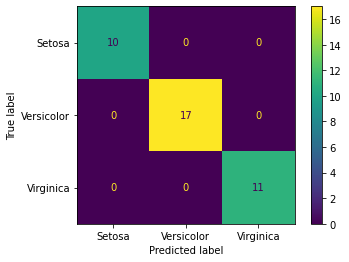

In [71]:
cm = confusion_matrix(y_test, logreg_pred_test, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

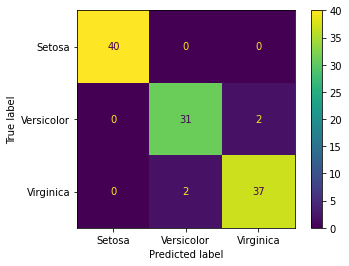

In [72]:
cm = confusion_matrix(y_train, logreg_pred_train, labels=logreg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg_model.classes_)

disp.plot()
plt.show()

In [73]:
print(classification_report(y_train,logreg_pred_train))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       0.94      0.94      0.94        33
   Virginica       0.95      0.95      0.95        39

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [74]:
print(classification_report(y_test,logreg_pred_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        17
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

